# Importing Libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt, seaborn as sns
import os
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
import xgboost as xgb
from pylab import rcParams
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
rcParams['figure.figsize'] = 14, 8
RANDOM_SEED = 42
LABELS = ["Normal", "Fraud"]

/kaggle/input/creditcardfraud/creditcard.csv


In [2]:
#TRAIN/VALIDATION/TEST SPLIT
#VALIDATION
VALID_SIZE = 0.20 # simple validation using train_test_split
TEST_SIZE = 0.20 # test size using_train_test_split

#CROSS-VALIDATION
NUMBER_KFOLDS = 5 #number of KFolds for cross-validation



RANDOM_STATE = 2018

RFC_METRIC = 'gini'  #metric used for RandomForrestClassifier
NUM_ESTIMATORS = 100 #number of estimators used for RandomForrestClassifier
NO_JOBS = 4 #number of parallel jobs used for RandomForrestClassifier

MAX_ROUNDS = 1000 #lgb iterations
EARLY_STOP = 50 #lgb early stop 
OPT_ROUNDS = 1000  #To be adjusted based on best validation rounds
VERBOSE_EVAL = 50 #Print out metric result

# Reading Dataset

In [3]:
df = pd.read_csv("/kaggle/input/creditcardfraud/creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

# EDA

/tmp/ipykernel_18/2267879667.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  count_classes = pd.value_counts(df['Class'], sort = True)


Text(0, 0.5, 'Frequency')

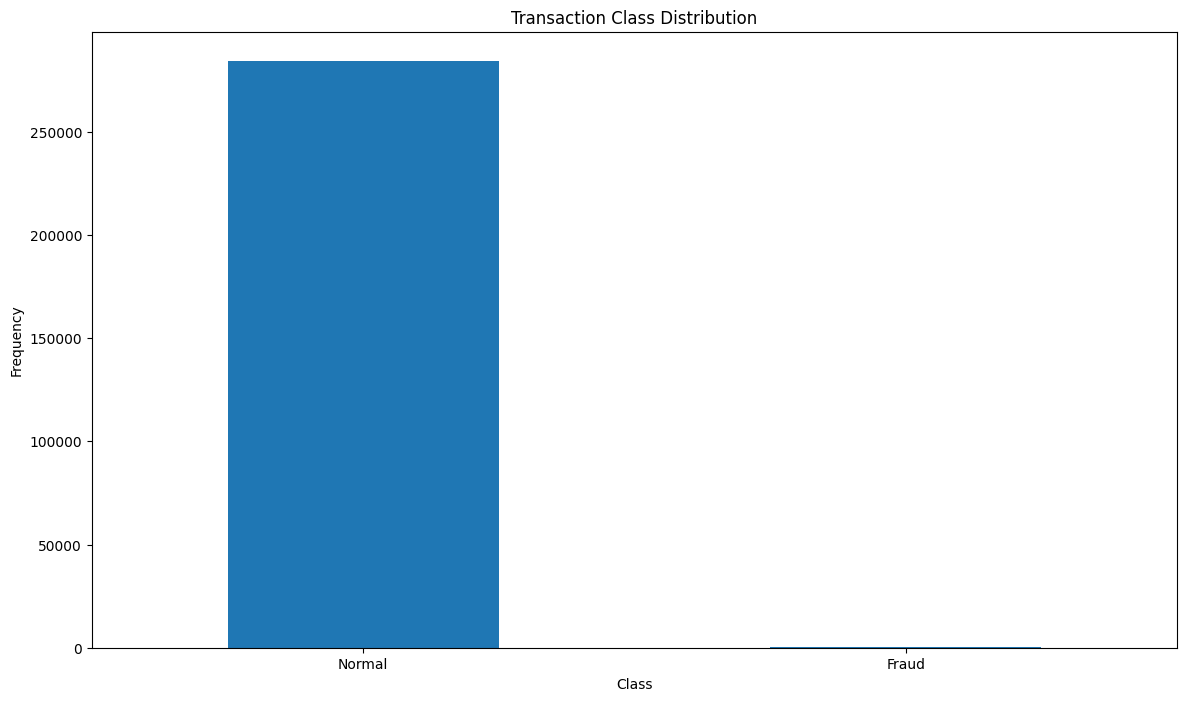

In [6]:
count_classes = pd.value_counts(df['Class'], sort = True)

count_classes.plot(kind = 'bar', rot=0)

plt.title("Transaction Class Distribution")

plt.xticks(range(2), LABELS)

plt.xlabel("Class")

plt.ylabel("Frequency")

In [7]:
#Get the Fraud and the normal dataset 

fraud = df[df['Class']==1]
normal = df[df['Class']==0]

In [8]:
print(fraud.shape,normal.shape)

(492, 31) (284315, 31)


In [9]:
#comparing the two transaction classes
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [10]:
normal.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

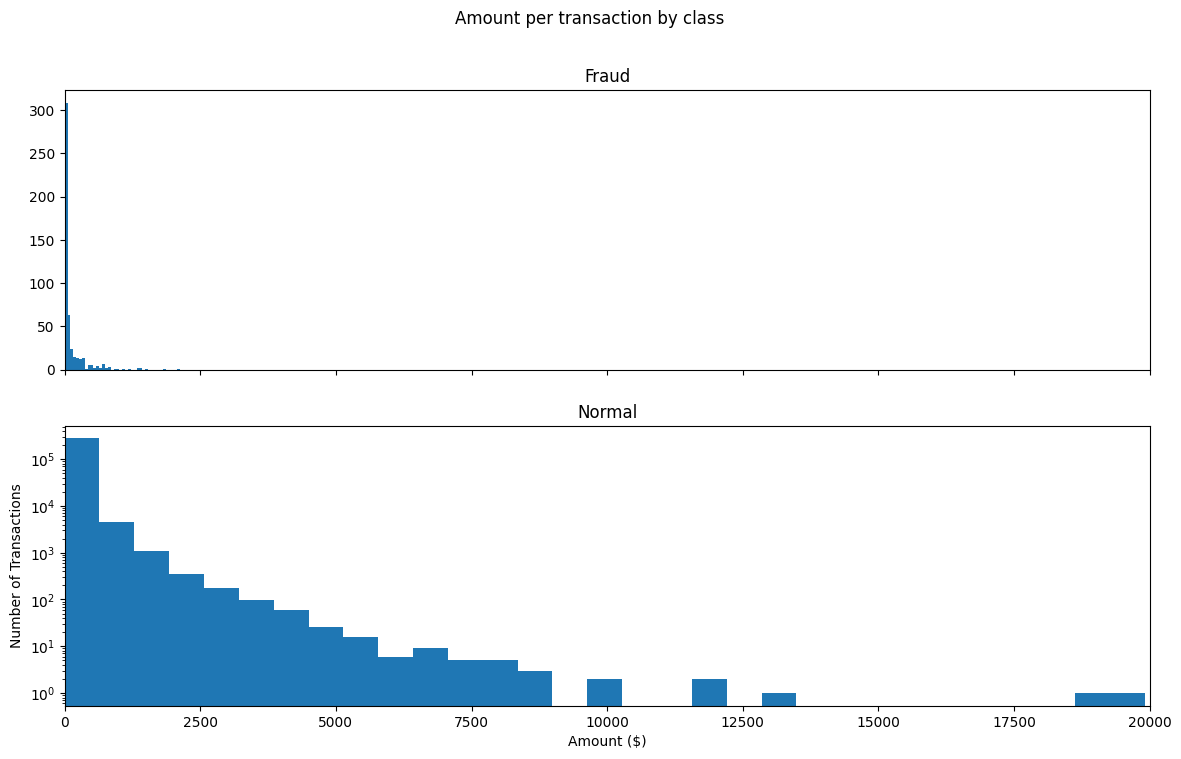

In [11]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Amount per transaction by class')
bins = 40
ax1.hist(fraud.Amount, bins = bins)
ax1.set_title('Fraud')
ax2.hist(normal.Amount, bins = bins)
ax2.set_title('Normal')
plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.xlim((0, 20000))
plt.yscale('log')
plt.show();

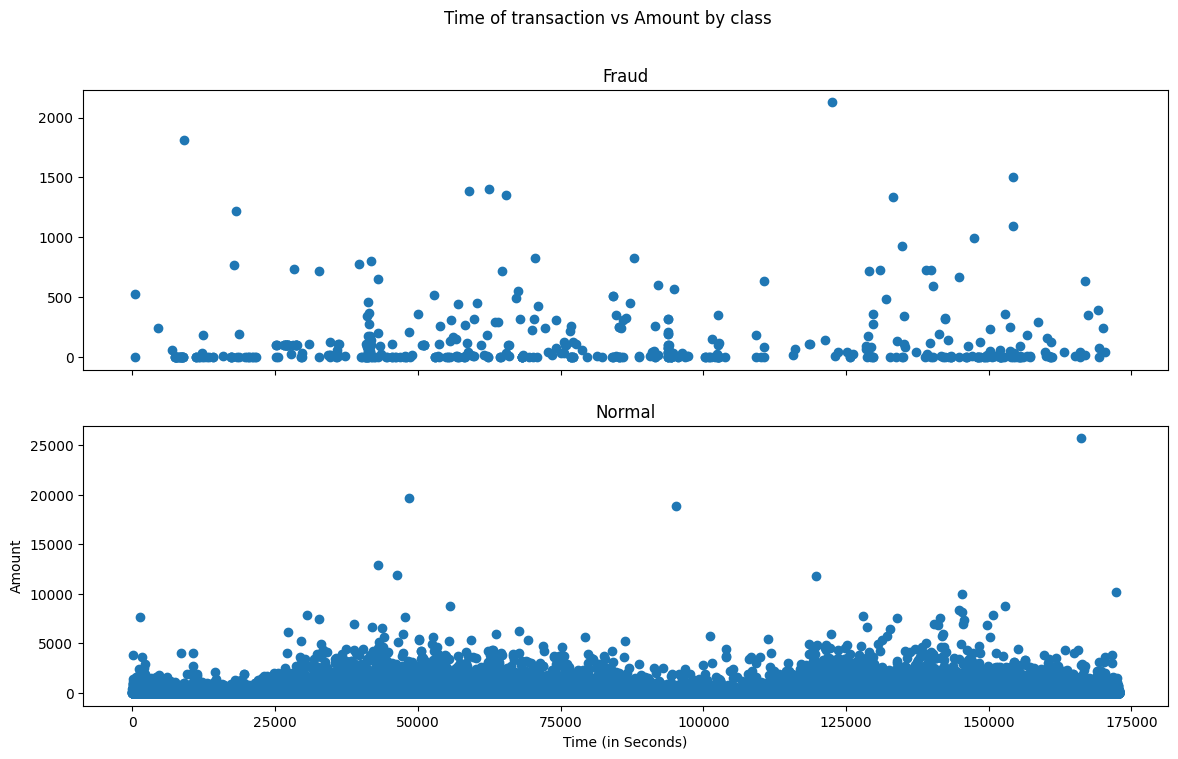

In [12]:
# We Will check Do fraudulent transactions occur more often during certain time frame ? Let us find out with a visual representation.

f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time of transaction vs Amount by class')
ax1.scatter(fraud.Time, fraud.Amount)
ax1.set_title('Fraud')
ax2.scatter(normal.Time, normal.Amount)
ax2.set_title('Normal')
plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()

In [13]:
# Taking a fraction of sample data

df1= df.sample(frac = 0.1,random_state=1)
print(df.shape)
print(df1.shape)

(284807, 31)
(28481, 31)


In [14]:
#Determine the number of fraud and valid transactions in the dataset

Fraud = df1[df1['Class']==1]

Valid = df1[df1['Class']==0]

outlier_fraction = len(Fraud)/float(len(Valid))

print(outlier_fraction)

print("Fraud Cases : {}".format(len(Fraud)))

print("Valid Cases : {}".format(len(Valid)))

0.0017234102419808666
Fraud Cases : 49
Valid Cases : 28432


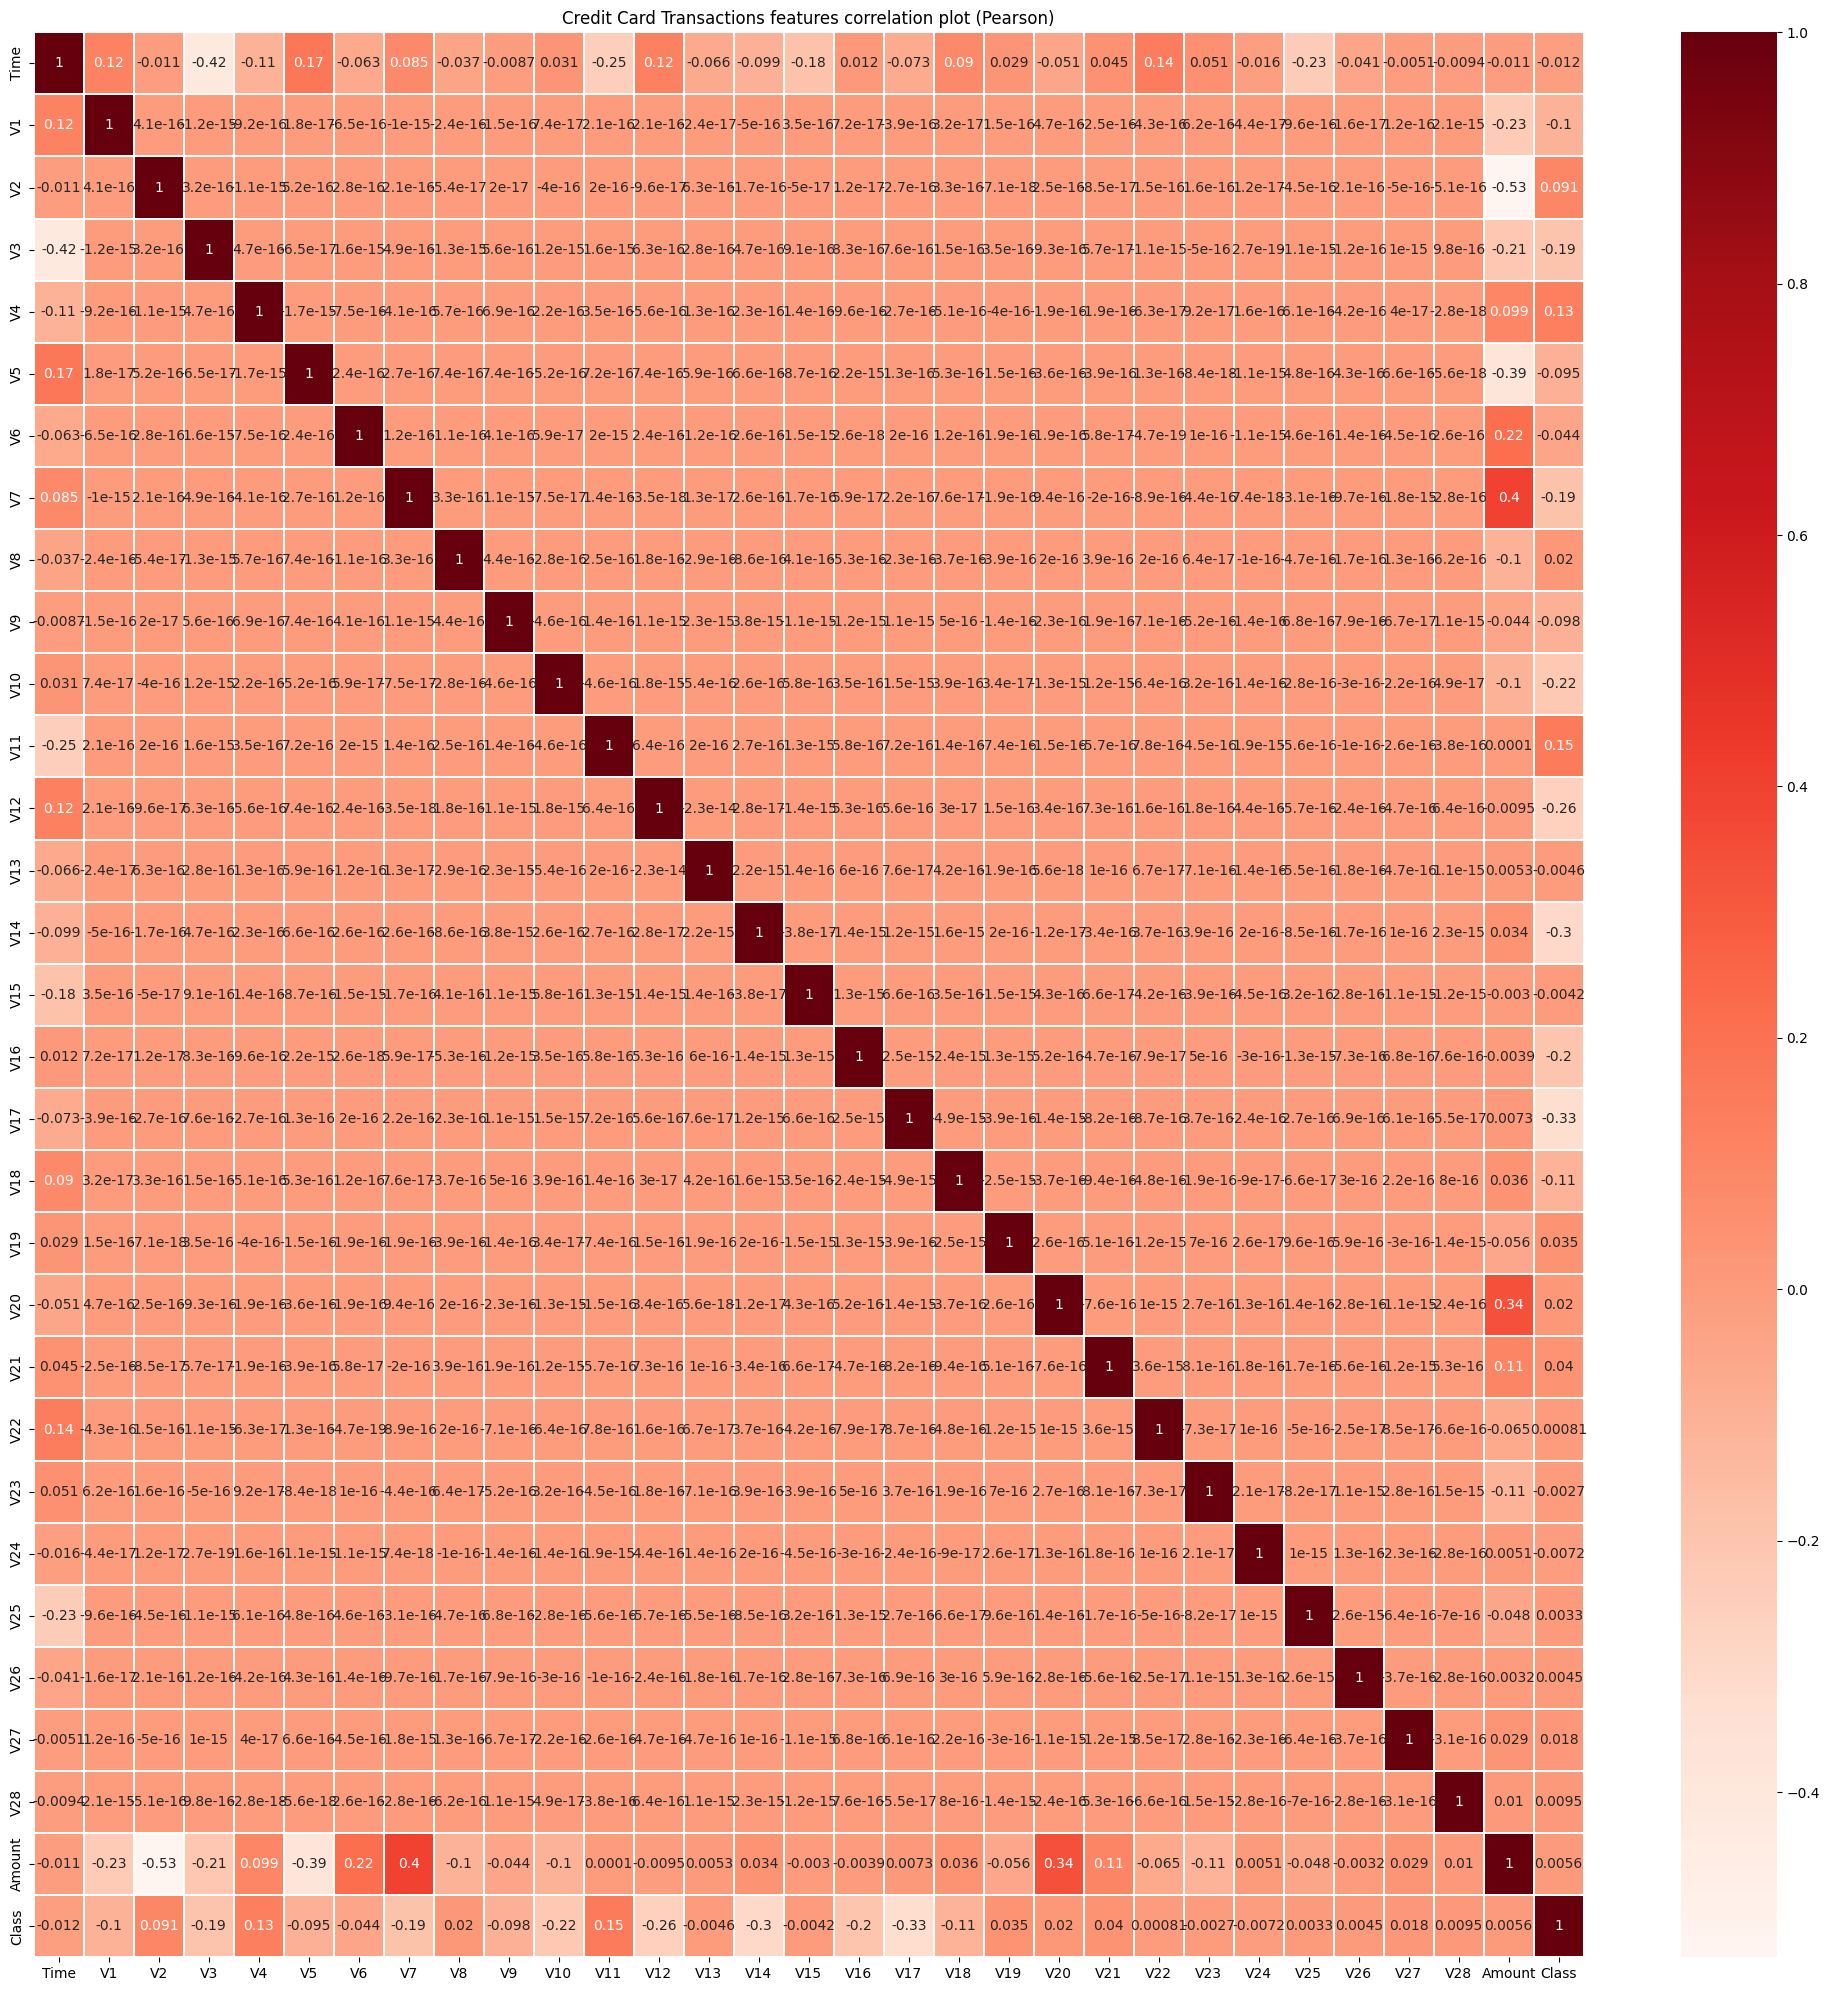

In [15]:
# Correlation matrix
corrmat = df1.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(25,25))
plt.title('Credit Card Transactions features correlation plot (Pearson)')
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,linewidths=.1,cmap="Reds")

# Model Development

In [16]:
target = 'Class'
predictors = ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',\
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19',\
       'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28',\
       'Amount']

In [17]:
train_df, test_df = train_test_split(df, test_size=TEST_SIZE, random_state=RANDOM_STATE, shuffle=True )
train_df, valid_df = train_test_split(train_df, test_size=VALID_SIZE, random_state=RANDOM_STATE, shuffle=True )

## Random Forest

In [18]:
clf = RandomForestClassifier(n_jobs=NO_JOBS, 
                             random_state=RANDOM_STATE,
                             criterion=RFC_METRIC,
                             n_estimators=NUM_ESTIMATORS,
                             verbose=False)

In [19]:
clf.fit(train_df[predictors], train_df[target].values)

RandomForestClassifier(n_jobs=4, random_state=2018, verbose=False)

In [20]:
preds = clf.predict(valid_df[predictors])

## Feature importance

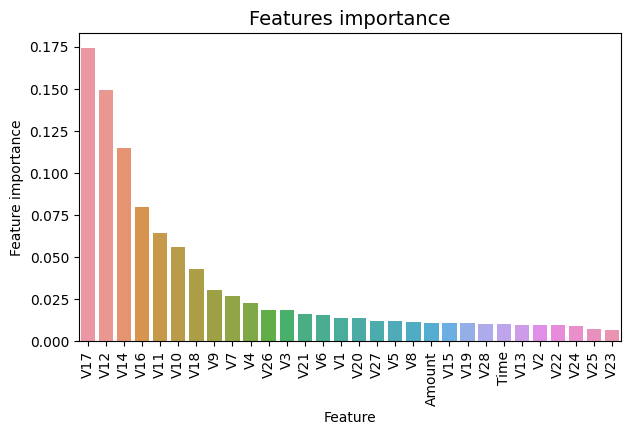

In [21]:
tmp = pd.DataFrame({'Feature': predictors, 'Feature importance': clf.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (7,4))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()  

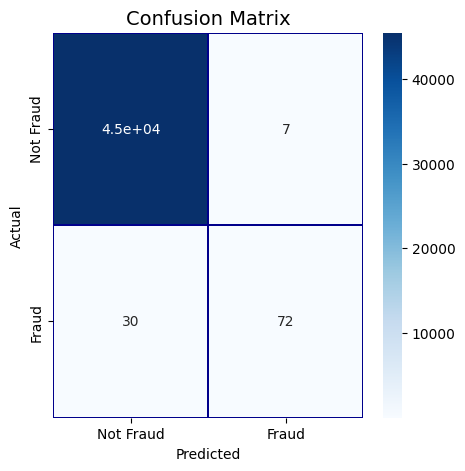

In [22]:
cm = pd.crosstab(valid_df[target].values, preds, rownames=['Actual'], colnames=['Predicted'])
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cm, 
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues")
plt.title('Confusion Matrix', fontsize=14)
plt.show()

In [23]:
roc_auc_score(valid_df[target].values, preds)

0.8528641975628091

## XGBoost

In [24]:
dtrain = xgb.DMatrix(train_df[predictors], train_df[target].values)
dvalid = xgb.DMatrix(valid_df[predictors], valid_df[target].values)
dtest = xgb.DMatrix(test_df[predictors], test_df[target].values)

watchlist = [(dtrain, 'train'), (dvalid, 'valid')]

params = {}
params['objective'] = 'binary:logistic'
params['eta'] = 0.039
params['silent'] = True
params['max_depth'] = 2
params['subsample'] = 0.8
params['colsample_bytree'] = 0.9
params['eval_metric'] = 'auc'
params['random_state'] = RANDOM_STATE

In [25]:
model = xgb.train(params, 
                dtrain, 
                MAX_ROUNDS, 
                watchlist, 
                early_stopping_rounds=EARLY_STOP, 
                maximize=True, 
                verbose_eval=VERBOSE_EVAL)

/opt/conda/lib/python3.10/site-packages/xgboost/core.py:727: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [20:13:06] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	train-auc:0.94070	valid-auc:0.88630
[50]	train-auc:0.94043	valid-auc:0.89529
[100]	train-auc:0.97414	valid-auc:0.96283
[150]	train-auc:0.98510	valid-auc:0.98126
[200]	train-auc:0.99295	valid-auc:0.98520
[250]	train-auc:0.99519	valid-auc:0.98406
[262]	train-auc:0.99567	valid-auc:0.98377


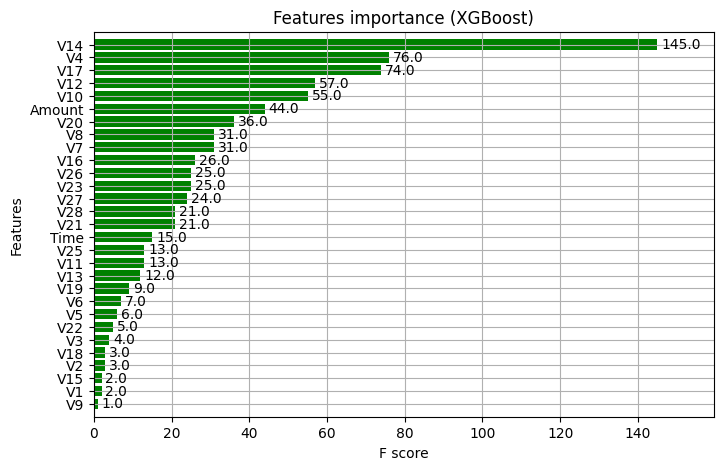

In [26]:
fig, (ax) = plt.subplots(ncols=1, figsize=(8,5))
xgb.plot_importance(model, height=0.8, title="Features importance (XGBoost)", ax=ax, color="green") 
plt.show()

In [27]:
preds = model.predict(dtest)

In [28]:
roc_auc_score(test_df[target].values, preds)

0.9796317400021104

## Training and validation using cross-validation

In [29]:
kf = KFold(n_splits = NUMBER_KFOLDS, random_state = RANDOM_STATE, shuffle = True)

# Create arrays and dataframes to store results
oof_preds = np.zeros(train_df.shape[0])
test_preds = np.zeros(test_df.shape[0])
feature_importance_df = pd.DataFrame()
n_fold = 0
for train_idx, valid_idx in kf.split(train_df):
    train_x, train_y = train_df[predictors].iloc[train_idx],train_df[target].iloc[train_idx]
    valid_x, valid_y = train_df[predictors].iloc[valid_idx],train_df[target].iloc[valid_idx]

In [30]:
# Initialize KFold
kf = KFold(n_splits=NUMBER_KFOLDS, random_state=RANDOM_STATE, shuffle=True)

# Create arrays to store results
oof_preds = np.zeros(train_df.shape[0])
test_preds = np.zeros(test_df.shape[0])

In [31]:
# Loop through folds
for fold, (train_idx, valid_idx) in enumerate(kf.split(train_df)):
    train_x, train_y = train_df[predictors].iloc[train_idx], train_df[target].iloc[train_idx]
    valid_x, valid_y = train_df[predictors].iloc[valid_idx], train_df[target].iloc[valid_idx]

In [32]:
# Prepare the train and validation datasets
dtrain = xgb.DMatrix(train_x, label=train_y)
dvalid = xgb.DMatrix(valid_x, label=valid_y)

In [33]:
# Set xgboost parameters
params = {
        'objective': 'binary:logistic',
        'eta': 0.039,
        'max_depth': 2,
        'subsample': 0.8,
        'colsample_bytree': 0.9,
        'eval_metric': 'auc',
        'random_state': RANDOM_STATE
    }

In [34]:
# Train the model
model = xgb.train(params, 
                      dtrain, 
                      MAX_ROUNDS, 
                      [(dtrain, 'train'), (dvalid, 'valid')], 
                      early_stopping_rounds=EARLY_STOP, 
                      maximize=True, 
                      verbose_eval=VERBOSE_EVAL)

/opt/conda/lib/python3.10/site-packages/xgboost/core.py:727: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.93476	valid-auc:0.96503
[50]	train-auc:0.93660	valid-auc:0.96485
[57]	train-auc:0.93660	valid-auc:0.96485


In [35]:
# Make predictions on validation set
valid_preds = model.predict(dvalid)

In [36]:
# Store out-of-fold predictions
oof_preds[valid_idx] = valid_preds

In [37]:
# Make predictions on test set and average them over folds
test_preds += model.predict(xgb.DMatrix(test_df[predictors])) / kf.n_splits

In [38]:
# Calculate and print AUC score for each fold
auc_score = roc_auc_score(valid_y, valid_preds)
print(f"Fold {fold + 1} AUC: {auc_score}")

Fold 5 AUC: 0.9648547673027238


In [39]:
# Calculate full AUC score
full_auc_score = roc_auc_score(train_df[target], oof_preds)
print(f"Full AUC score: {full_auc_score}")

Full AUC score: 0.5185946380111847


### Random Forest accuracy report

In [40]:
# Initialize and train the RandomForestClassifier
clf = RandomForestClassifier(n_jobs=NO_JOBS, 
                             random_state=RANDOM_STATE,
                             criterion=RFC_METRIC,
                             n_estimators=NUM_ESTIMATORS,
                             verbose=False)
clf.fit(train_df[predictors], train_df[target].values)

# Predictions
preds = clf.predict(valid_df[predictors])

# Accuracy Score
accuracy = accuracy_score(valid_df[target].values, preds)

# Classification Report
report = classification_report(valid_df[target].values, preds)

# Confusion Matrix
cm = confusion_matrix(valid_df[target].values, preds)

# Calculate ROC-AUC score
roc_auc = roc_auc_score(valid_df[target].values, preds)

# Print the accuracy report
print("Model Name: RandomForestClassifier\n")
print("Accuracy Score:")
print(accuracy)
print("\nClassification Report:")
print(report)
print("\nConfusion Matrix:")
print(cm)
print("\nROC-AUC Score:")
print(roc_auc)


Model Name: RandomForestClassifier

Accuracy Score:
0.999188044503939

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     45467
           1       0.91      0.71      0.80       102

    accuracy                           1.00     45569
   macro avg       0.96      0.85      0.90     45569
weighted avg       1.00      1.00      1.00     45569


Confusion Matrix:
[[45460     7]
 [   30    72]]

ROC-AUC Score:
0.8528641975628091


### XGBoost accuracy report

In [41]:
# Prepare the train and test datasets
dtrain = xgb.DMatrix(train_df[predictors], train_df[target].values)
dvalid = xgb.DMatrix(valid_df[predictors], valid_df[target].values)
dtest = xgb.DMatrix(test_df[predictors], test_df[target].values)

# Set xgboost parameters
params = {
    'objective': 'binary:logistic',
    'eta': 0.039,
    'silent': True,
    'max_depth': 2,
    'subsample': 0.8,
    'colsample_bytree': 0.9,
    'eval_metric': 'auc',
    'random_state': RANDOM_STATE
}

# Watchlist
watchlist = [(dtrain, 'train'), (dvalid, 'valid')]

# Train the model
model = xgb.train(params, 
                  dtrain, 
                  MAX_ROUNDS, 
                  watchlist, 
                  early_stopping_rounds=EARLY_STOP, 
                  maximize=True, 
                  verbose_eval=VERBOSE_EVAL)

# Predict test set
preds = model.predict(dtest)

# Accuracy Score
accuracy = accuracy_score(test_df[target].values, preds.round())

# Classification Report
report = classification_report(test_df[target].values, preds.round())

# Confusion Matrix
cm = confusion_matrix(test_df[target].values, preds.round())

# Calculate ROC-AUC score
roc_auc = roc_auc_score(test_df[target].values, preds)

# Print the accuracy report
print("Model Name: XGBoost\n")
print("Accuracy Score:")
print(accuracy)
print("\nClassification Report:")
print(report)
print("\nConfusion Matrix:")
print(cm)
print("\nROC-AUC Score:")
print(roc_auc)


/opt/conda/lib/python3.10/site-packages/xgboost/core.py:727: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [20:14:35] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	train-auc:0.94070	valid-auc:0.88630
[50]	train-auc:0.94043	valid-auc:0.89529
[100]	train-auc:0.97414	valid-auc:0.96283
[150]	train-auc:0.98510	valid-auc:0.98126
[200]	train-auc:0.99295	valid-auc:0.98520
[250]	train-auc:0.99519	valid-auc:0.98406
[262]	train-auc:0.99567	valid-auc:0.98377
Model Name: XGBoost

Accuracy Score:
0.9994382219725431

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56862
           1       0.93      0.74      0.82       100

    accuracy                           1.00     56962
   macro avg       0.96      0.87      0.91     56962
weighted avg       1.00      1.00      1.00     56962


Confusion Matrix:
[[56856     6]
 [   26    74]]

ROC-AUC Score:
0.9796317400021104


Based on the accuracy reports for the RandomForestClassifier and XGBoost models, we can draw the following conclusions:

1. Accuracy Score: Both models achieved very high accuracy scores, indicating their effectiveness in classifying the majority of instances correctly. The RandomForestClassifier achieved an accuracy of approximately 99.92%, while the XGBoost model achieved an accuracy of approximately 99.94%.

2. Precision and Recall: Looking at the classification report, we observe that both models achieved high precision and recall values for class 0 (non-fraudulent transactions). This indicates that the models correctly identified the vast majority of non-fraudulent transactions while maintaining a low false positive rate. However, for class 1 (fraudulent transactions), the XGBoost model outperformed the RandomForestClassifier in terms of precision and recall, achieving higher values for both metrics.

3. F1-score: The F1-score considers both precision and recall and provides a balanced measure of a model's performance. Both models achieved high F1-scores for class 0, indicating a good balance between precision and recall. However, for class 1, the XGBoost model achieved a higher F1-score compared to the RandomForestClassifier, indicating better overall performance in detecting fraudulent transactions.

4. Confusion Matrix: The confusion matrix provides a detailed breakdown of the model's predictions. Both models correctly classified the majority of instances (true negatives) while also correctly identifying some instances of fraud (true positives). However, the XGBoost model achieved a slightly higher number of true positives and a lower number of false negatives compared to the RandomForestClassifier, indicating better performance in detecting fraudulent transactions.

5. ROC-AUC Score: The ROC-AUC score measures the model's ability to discriminate between positive and negative classes across different threshold values. The XGBoost model achieved a higher ROC-AUC score (approximately 0.98) compared to the RandomForestClassifier (approximately 0.85), indicating better overall performance in distinguishing between fraudulent and non-fraudulent transactions.

In conclusion, both models performed exceptionally well in classifying transactions, with the XGBoost model demonstrating slightly superior performance, particularly in detecting fraudulent transactions. Therefore, based on the provided accuracy reports, we would recommend the XGBoost model for fraud detection tasks due to its higher precision, recall, F1-score, and ROC-AUC score.